# Transpilation

### Why Quantum Circuits Need Optimization for Real Hardware
Quantum computers in the real world are noisy, error-prone, and have hardware constraints, unlike the idealized circuits you might draw in a textbook.

Key limitations:

1. Qubit connectivity: Not all qubits are connected to each other.

2. Gate errors: Some quantum gates have higher error rates than others.

3. Decoherence: Qubits lose their quantum state over time.

4. Readout errors: Measuring qubits is not always accurate.

So, to increase the chances of getting correct results, circuits must be optimized before running on hardware.

### Why Transpilation is Necessary
Transpilation is the process of transforming an abstract quantum circuit into a version that is compatible with the physical hardware.

What transpilation does:

1. Maps logical qubits to physical qubits on the device.

2. Inserts SWAP gates when qubits that need to interact aren’t directly connected.

3. Replaces unsupported gate sets with equivalent native gates.

4. Tries to minimize gate count, circuit depth, and overall error.

Without transpilation, a quantum circuit can't be executed properly on IBM Q or any hardware backend.

### IBM’s Quantum Devices: Coupling Maps and Qubit Layouts
IBM’s quantum processors have specific qubit topologies, which define:

1. Which qubits are connected (coupling map).

2. The directionality of controlled operations (some are unidirectional).

3. The error rates and coherence times for each qubit.

Example: A 5-qubit IBM device like ibmq_belem might have a coupling map like:
(0 ↔ 1), (1 ↔ 2), (2 ↔ 3), (3 ↔ 4)
Meaning qubit 0 can’t directly interact with qubit 4—you’d need to insert SWAP gates.

Transpilers use this hardware-aware information to intelligently adjust circuits before execution.

### Imports

In [14]:
from qiskit import QuantumCircuit, transpile
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.visualization import plot_circuit_layout
import matplotlib.pyplot as plt

### Circuit without transpilation

[<IBMBackend('ibm_brisbane')>, <IBMBackend('ibm_sherbrooke')>, <IBMBackend('ibm_torino')>]
ibm_torino
Original circuit:


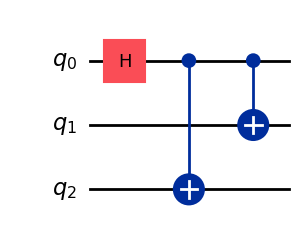

In [15]:
# 1. Load IBMQ account and get backend
service = QiskitRuntimeService(name='qgss-2025')
print(service.backends())
backend = service.least_busy()
print(backend.name)

# 2. Create a simple quantum circuit
qc = QuantumCircuit(3)
qc.h(0)
qc.cx(0, 2)
qc.cx(0, 1)

print("Original circuit:")
qc.draw('mpl')

### Circuit after transpilation


Transpiled circuit for ibm_torino


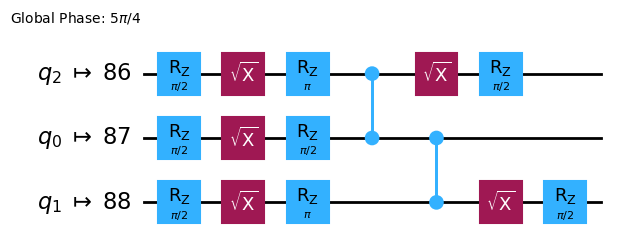

In [16]:
# 3. Transpile the circuit for the real backend
transpiled_qc = transpile(qc, backend=backend, optimization_level=3)

print("\nTranspiled circuit for", backend.name)
transpiled_qc.draw('mpl')

## Coupling Map

In [17]:
# 4. Visualize coupling map (device connectivity)
print("\nCoupling map:")
print(backend.configuration().coupling_map)

# 5. Visualize layout of logical to physical qubits
from qiskit.visualization import plot_gate_map
plot_gate_map(backend)



Coupling map:
[[0, 1], [0, 15], [1, 0], [1, 2], [2, 1], [2, 3], [3, 2], [3, 4], [4, 3], [4, 5], [4, 16], [5, 4], [5, 6], [6, 5], [6, 7], [7, 6], [7, 8], [8, 7], [8, 9], [8, 17], [9, 8], [9, 10], [10, 9], [10, 11], [11, 10], [11, 12], [12, 11], [12, 13], [12, 18], [13, 12], [13, 14], [14, 13], [15, 0], [15, 19], [16, 4], [16, 23], [17, 8], [17, 27], [18, 12], [18, 31], [19, 15], [19, 20], [20, 19], [20, 21], [21, 20], [21, 22], [21, 34], [22, 21], [22, 23], [23, 16], [23, 22], [23, 24], [24, 23], [24, 25], [25, 24], [25, 26], [25, 35], [26, 25], [26, 27], [27, 17], [27, 26], [27, 28], [28, 27], [28, 29], [29, 28], [29, 30], [29, 36], [30, 29], [30, 31], [31, 18], [31, 30], [31, 32], [32, 31], [32, 33], [33, 32], [33, 37], [34, 21], [34, 40], [35, 25], [35, 44], [36, 29], [36, 48], [37, 33], [37, 52], [38, 39], [38, 53], [39, 38], [39, 40], [40, 34], [40, 39], [40, 41], [41, 40], [41, 42], [42, 41], [42, 43], [42, 54], [43, 42], [43, 44], [44, 35], [44, 43], [44, 45], [45, 44], [45, 46]

c:\Users\shiva\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:3452: DecompressionBombWarning: Image size (134515178 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


In [18]:
print("Coupling map size:", len(backend.configuration().coupling_map))
print("Number of qubits:", backend.configuration().num_qubits)
print("Sample connections:")
print(backend.configuration().coupling_map[:10])  # First 10 links

Coupling map size: 300
Number of qubits: 133
Sample connections:
[[0, 1], [0, 15], [1, 0], [1, 2], [2, 1], [2, 3], [3, 2], [3, 4], [4, 3], [4, 5]]
